In [1]:
import os
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.utils import class_weight
from tensorflow.keras.metrics import Precision, Recall

In [2]:
data_dir = r'C:\Users\haris\AI\ML\Projects\Data\Cars Dataset - Copy'

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip = True,                         
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

datagen2 = ImageDataGenerator(rescale=1./255, horizontal_flip = False, validation_split=0.2)

datagen3 = ImageDataGenerator(rescale=1./255, horizontal_flip = False)

train_images = datagen.flow_from_directory(
                                          os.path.join(data_dir, 'train'),
                                          target_size = img_size,
                                          class_mode = "categorical",
                                          shuffle = True,
                                          batch_size = batch_size,
                                          subset = 'training')

valid_images = datagen2.flow_from_directory(os.path.join(data_dir, 'train'),
                                           target_size = img_size,
                                           class_mode = "categorical",
                                           shuffle = False,
                                           batch_size = batch_size,
                                           subset = 'validation')
test_images = datagen3.flow_from_directory(os.path.join(data_dir, 'test'),
                                           target_size = img_size,
                                           class_mode = "categorical",
                                           shuffle = False,
                                           batch_size = batch_size)

Found 14000 images belonging to 7 classes.
Found 2800 images belonging to 7 classes.
Found 813 images belonging to 7 classes.


In [3]:
base_model = MobileNetV2(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization() (x)
x = Dense(1024, activation = "relu") (x)
x = Dropout(0.3) (x)
x = Dense(512, activation = "relu") (x)
x = Dropout(0.25) (x)
x = Dense(128, activation = "relu") (x)
x = Dropout(0.15) (x)
x = Dense(64, activation = "relu") (x)
x = Dropout(0.15) (x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[Precision(name='precision'), Recall(name='recall'), 'accuracy']
)

early_stopping = EarlyStopping(monitor="val_accuracy", patience  = 5,verbose=1, restore_best_weights=True)

history = model.fit(
    train_images,
    validation_data=valid_images,
    batch_size=batch_size,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
438/438 [==============================] - 146s 314ms/step - loss: 0.7963 - precision: 0.8248 - recall: 0.6466 - accuracy: 0.7301 - val_loss: 0.4519 - val_precision: 0.8922 - val_recall: 0.8125 - val_accuracy: 0.8539
Epoch 2/100
438/438 [==============================] - 131s 300ms/step - loss: 0.4629 - precision: 0.8960 - recall: 0.8119 - accuracy: 0.8514 - val_loss: 0.2765 - val_precision: 0.9370 - val_recall: 0.8768 - val_accuracy: 0.9039
Epoch 3/100
438/438 [==============================] - 133s 305ms/step - loss: 0.3340 - precision: 0.9223 - recall: 0.8671 - accuracy: 0.8923 - val_loss: 0.2493 - val_precision: 0.9388 - val_recall: 0.9032 - val_accuracy: 0.9200
Epoch 4/100
438/438 [==============================] - 134s 307ms/step - loss: 0.2952 - precision: 0.9320 - recall: 0.8857 - accuracy: 0.9085 - val_loss: 0.1888 - val_precision: 0.9501 - val_recall: 0.9239 - val_accuracy: 0.9368
Epoch 5/100
438/438 [==============================] - 133s 304ms/step - loss: 0.246

In [4]:
# num_epochs = len(history.history['loss'])
# print(num_epochs)
# num_batches_per_epoch = history.params['steps']
# print(num_batches_per_epoch)
# total_images_processed = num_epochs * num_batches_per_epoch * batch_size

# print("Total number of images processed during training:", total_images_processed)

32
438
Total number of images processed during training: 448512


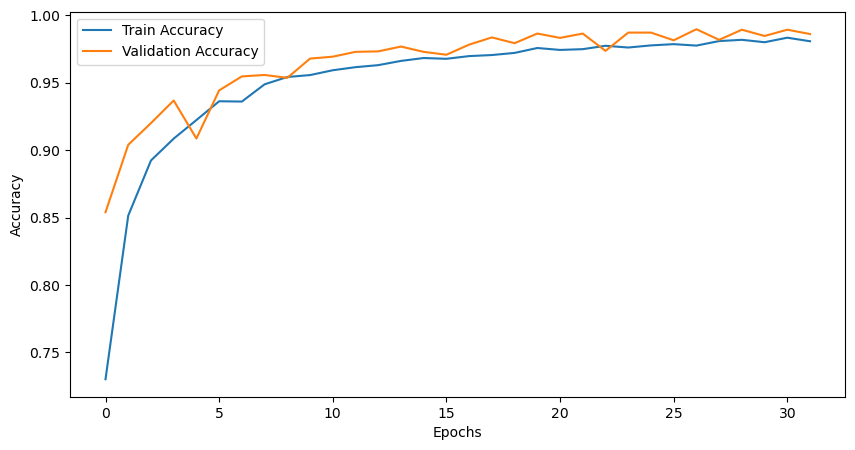

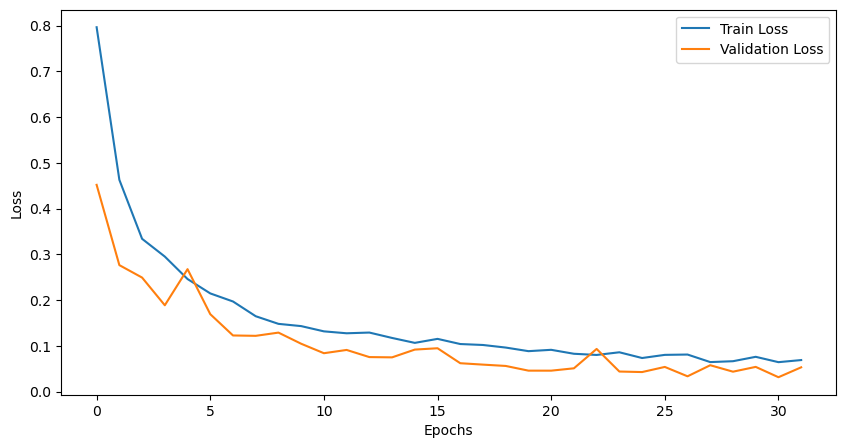

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')  
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

26/26 [==============================] - 1s 40ms/step - loss: 0.2859 - precision: 0.9436 - recall: 0.9262 - accuracy: 0.9336
Test Loss: 0.2859426438808441
Test Accuracy: 0.9436089992523193
26/26 [==============================] - 1s 42ms/step
Classification Report:
                   precision    recall  f1-score   support

            Audi       0.92      0.92      0.92       199
   Hyundai Creta       0.95      0.88      0.91        67
Mahindra Scorpio       0.99      0.96      0.97        75
     Rolls Royce       0.77      0.88      0.82        74
           Swift       0.96      0.93      0.95       102
     Tata Safari       0.95      0.94      0.95       106
   Toyota Innova       0.96      0.97      0.97       190

        accuracy                           0.93       813
       macro avg       0.93      0.93      0.93       813
    weighted avg       0.94      0.93      0.93       813



<AxesSubplot:>

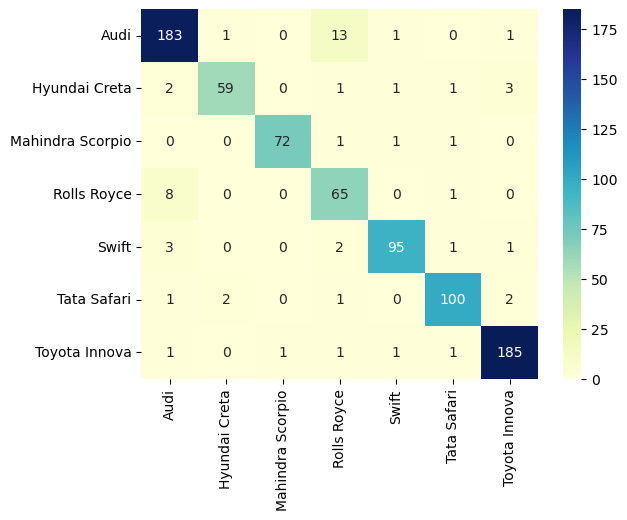

In [8]:
true_classes = test_images.classes

class_names = list(test_images.class_indices.keys())

test_evaluation = model.evaluate(test_images)

test_loss = test_evaluation[0]
test_accuracy = test_evaluation[1]

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)

confusion_mat = confusion_matrix(true_classes, test_predictions_classes)

classification_rep = classification_report(true_classes, test_predictions_classes, target_names=class_names)
print("Classification Report:\n", classification_rep)

import seaborn as sn
df_cm = pd.DataFrame(confusion_mat, index=class_names, columns=class_names)
sn.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")

In [7]:
# classification_dict = classification_report(true_classes, test_predictions_classes, target_names=class_names, output_dict=True)
# classification_df = pd.DataFrame(classification_dict).transpose()


# excel_path = os.path.join(r'C:\Users\haris\AI\ML\Projects\Data\Cars Dataset', 'classification_report.xlsx')
# classification_df.to_excel(excel_path, index=True)

# print(f"Classification report saved as Excel to {excel_path}")

Classification report saved as Excel to C:\Users\haris\AI\ML\Projects\Data\Cars Dataset\classification_report.xlsx


In [9]:
model.save("car_classification_model.h5")
print("Model saved successfully.")

Model saved successfully.


In [10]:
print(class_names)

['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']
